In [77]:
%pip install seaborn
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
#Printing column titles of the data in the dataset
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [79]:
#Printing the species names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [75]:
#Converting the data from the dataset to a dataframe, simultaneously assigning species names to the numbers in the target column
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target']).astype({'target': int}).assign(species=lambda x: x['target'].map(dict(enumerate(iris['target_names']))))
#Printing the data
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [80]:
#Printing number of items of each species
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

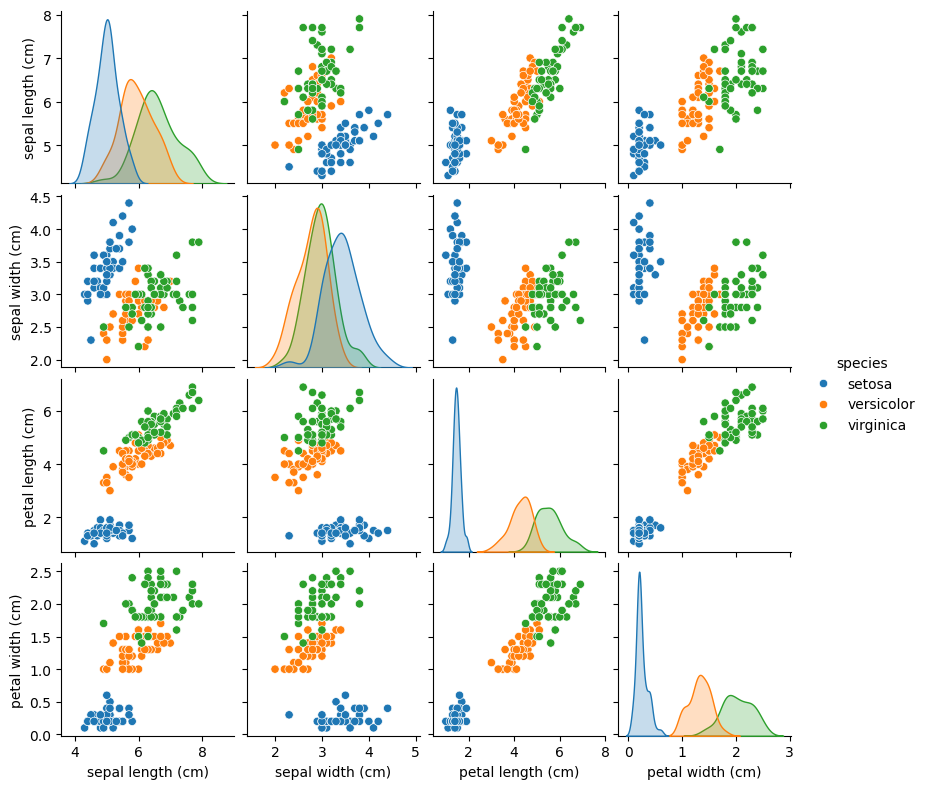

In [81]:
#Pair plotting all the available data for easy visualisation
sns.pairplot(df.drop(['target'], axis = 1), hue='species', height=2)
plt.show()

In [91]:
#Splitting the dataset into two parts, one to train the Logistic Regression model and the other to test the model on
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, df['species'], test_size = 0.1)
#Printing the length of the array X_train i.e. number of data items being used to train the model
len(X_train)

135

In [92]:
#Creating a Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=120)

In [93]:
#Training the model
model.fit(X_train, y_train)

LogisticRegression()

In [94]:
#Testing the model using the 'test' part of the data and printing the score which conveys how accurate the model is
model.score(X_test, y_test)

1.0

In [96]:
#Creating a confusion matrix to easily visualise the results
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[4, 0, 0],
       [0, 6, 0],
       [0, 0, 5]], dtype=int64)

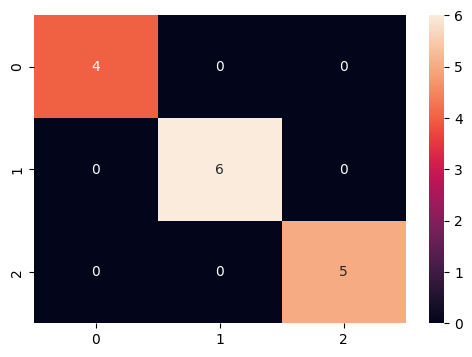

In [97]:
#Plotting the confusion matrix as a heatmap to compare the failed and successful test cases
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True)
plt.xlabel = 'Predicted'
plt.ylabel = 'Truth'

In [102]:
#Re-trying using a larger test set i.e. a smaller training set
Xn_train, Xn_test, yn_train, yn_test = train_test_split(iris.data, df['species'], test_size = 0.3)
len(Xn_train)

105

In [103]:
new_Model = LogisticRegression()
new_Model.fit(Xn_train, yn_train)

LogisticRegression()

In [104]:
new_Model.score(Xn_test, yn_test)

0.9333333333333333

In [105]:
yn_predicted = new_Model.predict(Xn_test)
cm_n = confusion_matrix(yn_test, yn_predicted)
cm_n

array([[11,  0,  0],
       [ 0, 18,  3],
       [ 0,  0, 13]], dtype=int64)

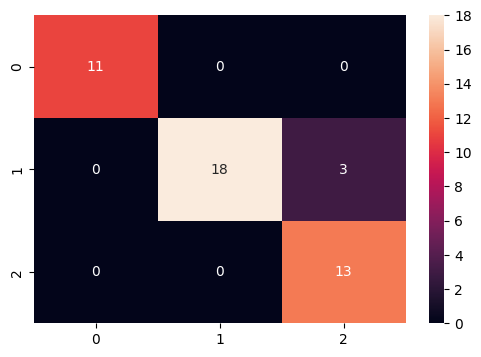

In [106]:
plt.figure(figsize = (6, 4))
sns.heatmap(cm_n, annot = True)
plt.xlabel = 'Predicted'
plt.ylabel = 'Truth'